In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Haar Wavelets
<hr style="border-width:4px; border-color:coral"></hr>

Advantages of Fourier transforms (Discrete transform)

\begin{equation}
\hat{f}_n = \sum_{k=0}^{N-1} f_k e^{2\pi i n x_k}
\end{equation}

* Frequency content

* Derivatives are easy to compute

But one major disadvange : We don't get any information about where the high frequencies occur.  For truly periodic signals, this isn't a problem.  But it makes Fourier transforms ill-suited for doing analysis of images or voice recordings, for example.

The *wavelet* transforms were deveoped to solve this problem.  

Reference :
    ["Wavelets Made Easy", Yves Nievergelt, (Birkhäuser,, 1999).](https://www.amazon.com/Wavelets-Made-Easy-Yves-Nievergelt/dp/0817640614)  


## Haar transform
<hr style="border-width:4px; border-color:coral"></hr>

To start, we define a *step* function (also referred to as a *scaling function*) as 

\begin{equation}
\phi_{[0,1)}(x) = 
 \left\{\begin{array}{rc}
1 & \mbox{if} \quad 0 \le x < 1 \\
0 & \mbox{otherwise}
\end{array}\right.
\end{equation}

A related function is the *Haar wavelet*, given by

\begin{equation}
\psi_{[0,1)}(x) = \left\{\begin{array}{rc}
1 & \mbox{if} \quad 0 \le x < \frac{1}{2} \\
-1 & \mbox{if} \quad \frac{1}{2} \le x < 1 \\
0 & \mbox{otherwise}
\end{array}\right.
\end{equation}

* The subscripts $[0,1)$ on each function name indicates the support of the function.  In general, the domains will be *dyadic* intervals $[k 2^j, (k+1) 2^j)$. 

* The Haar wavelet function can be written as a difference of the step functions as 

\begin{equation}
\psi_{[0,1)} = \phi_{[0,1/2)} - \phi_{[1/2,1)}
\end{equation}

We can easily code and plot the step function $\phi_{[u,w)}(x)$ and $\psi_{[u,w)}(x)$.  

In [2]:
def step(x,u=0,w=1):
    return where(logical_and(x >= u, x < w),1,0)

def haar(x,u=0,w=1):
    v = (u+w)/2   
    b1 = logical_and(u <= x,x < v) 
    b2 = logical_and(v <= x,x < w)
    return where(b1,1,0) + where(b2,-1,0)

<IPython.core.display.Javascript object>


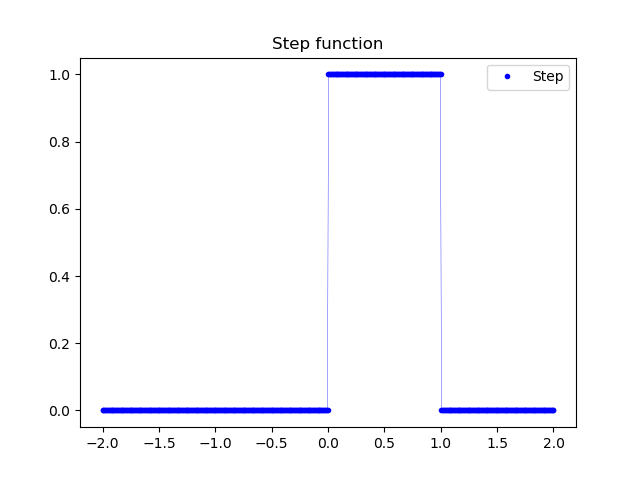

In [3]:
figure(1)
clf()
x = linspace(-2,2,500)
plot(x,step(x),'b.',label="Step")
plot(x,step(x),'b-',linewidth=0.25)
title('Step function')
legend()

In [ ]:
figure(2)
clf()

plot(x,haar(x),'r.',label="Haar")
plot(x,haar(x),'r-',linewidth=0.25)
title('Haar wavelet')
legend()

### Example - 2 point signal
<hr style="border-width:2px; border-color:black"></hr>

We can use the step function to define a function on $C^0[0,1]$.   For a signal $\mathbf s = (s_0, s_1)$ with two points, our reconstructed function is given by

\begin{equation}
f(x) = s_0 \phi_{[0,1/2)}(x) + s_1 \phi_{[1/2,1)}(x)
\end{equation}



<IPython.core.display.Javascript object>


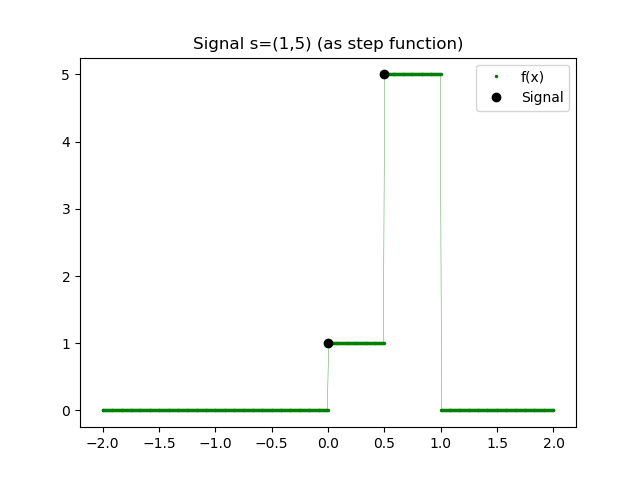

In [4]:
figure(3)
clf()

s = [1,5]

f = s[0]*step(x,0,0.5) + s[1]*step(x,0.5,1)
plot(x,f,'g.',label='f(x)',markersize=3)
plot(x,f,'g',linewidth=0.25)
plot([0,0.5],s,'k.',markersize=12,label='Signal')

title('Signal s=(1,5) (as step function)')
legend()

### Haar Transform
<hr style="border-width:2px; border-color:coral"></hr>

Suppose we have a signal consisting of two data values $(r_0,s_0)$ and $(r_1,s_1)$.  For simplicity, we will assume that $r_0 = 0$ and  $r_1 = 1/2$, and we denote the signal of length $2^1$ as $\mathbf s^1 = (s_0,s_1)$. 

Writing the signal as a function on $C^0[0,1]$ as 

\begin{equation}
f(x) = s_0 \phi_{[0,1/2)}(x) + s_1 \phi_{[1/2,1)}(x)
\end{equation}

we can then decompose $f(x)$ into an *average* plus a *difference* as 

\begin{equation}
f(x) = \left(\frac{s_1 + s_2}{2}\right) \phi_{[0,1)}(x) + \left(\frac{s_1 - s_2}{2}\right) \psi_{[0,1)}(x)
\end{equation}

This is the *wavelet* decomposition in terms of Haar bases.  We write the *ordered* Haar transform on $2^1$ points as 

\begin{equation}
\mathbf s^0 = \left(\frac{s_1 + s_2}{2};  \frac{s_1 - s_2}{2} \right) = \left(a_0^0; c_0^0  \right)
\end{equation}

If we have four points in our signal $\mathbf s^2 = (s_0, s_1, s_2, s_3)$, we need two sweeps to produce a transform of four points.  

**Sweep 1**
\begin{equation}
\mathbf s^1 = \left(\frac{s_0 + s_1}{2}, \frac{s_2 + s_3}{2};  \frac{s_0 - s_1}{2}, \frac{s_2 - s_3}{2} \right)
= \left(a^1_0, a^1_1; c^1_0, c^1_1 \right)
\end{equation}

**Sweep 2** (transform)
\begin{equation}
\mathbf s^0 = \left(\frac{s_0 + s_1 + s_2 + s_3}{4}; \frac{s_0 + s_1 - s_2 - s_3}{2},  \frac{s_0 - s_1}{2}, \frac{s_2 - s_3}{2} \right) = \left(a^0_0; c^0_0, c^1_0, c^1_1 \right)
\end{equation}


* This is an example of the *ordered* transform.  Notice that the average of the data shows up as the first entry. 

* The Haar transform does not depend on the abscissa $\left\{r_j\right\}$. 


### Inverse Haar Transform
<hr style="border-width:2px; border-color:coral"></hr>


Given the Haar Transform of our signal of length $2^1$, 

\begin{equation}
\mathbf s^0 = \left(\frac{s_0 + s_1}{2};  \frac{s_0 - s_1}{2} \right) = \left(a^0_0; c^0_0 \right)
\end{equation}

we can recover the original signal $(s_0, s_1)$ exactly as follows. 

\begin{eqnarray}
s_0 & = & a^0_0 + c_0^0 \\
s_1 & = & a^0_0 - c_0^0 \\
\end{eqnarray}




## Example : 
<hr style="border-width:2px; border-color:black"></hr>


Suppose our signal is given by $\mathbf s^2 = (5,1,2,8)$.   The the two sweeps produce

**Sweep 1**

\begin{equation}
\mathbf s^1 = (3,5; 2,-3)
\end{equation}

**Sweep 2** (transform)

\begin{equation}
\mathbf s^0 = (4; -1, 2,-3)
\end{equation}



## The "in-place" transform
<hr style="border-width:2px; border-color:black"></hr>

A form that is easier for computation and analysis is the "in-place" transform.   This produces the same coefficients as above, but in a different order.  

Using the example from above - $\mathbf s^2 = (5,1,2,8)$ - the two sweeps produce

**Sweep 1**

\begin{equation}
\mathbf s^1 = (3,2,5,-3)
\end{equation}

**Sweep 2** (transform)

\begin{equation}
\mathbf s^0 = (4,  2, -1, -3)
\end{equation}


<hr style="border-width:2px; border-color:black"></hr>

We can try this on a larger sample $\mathbf s = (3,1,0,4,8,6,9,9)$ to get 

**Sweep 1**

\begin{equation}
\mathbf s^2 = (2,1,2,-2,7,1,9,0)
\end{equation}

**Sweep 2**

\begin{equation}
\mathbf s^1 = (2,  1,  0, -2,  8,  1, -1,  0)
\end{equation}

**Sweep 3** (transform)

\begin{equation}
\mathbf s^0 = (5,  1,  0, -2, -3,  1, -1,  0)
\end{equation}




In [5]:
# Coding the In-Place Haar Transform

def haar_transform(s,prt=False):
    N = len(s)
    p = int(log2(N))
    inc = 1
    for k in range(p):
        n = 2**(p-k)
        s1 = s[range(0,N,inc)]
        r1 = range(0,n,2)
        r2 = range(1,n,2)
        a = (s1[r1] + s1[r2])/2.0
        c = (s1[r1] - s1[r2])/2.0
        s[range(0,N,2*inc)] = a
        s[range(inc,N,2*inc)] = c
        inc *= 2
        if prt:
            print("Sweep {:d}    ".format(p-k),s)
        
    return array(s).astype(float)

def inverse_Haar_transform(s,prt=False):
    N = len(s) 
    p = int(log2(N))
    inc = N//2 
    for k in range(p-1,-1,-1):
        n = 2**(p-k)
        s1 = s[range(0,N,inc)]
        r1 = range(0,n,2)
        r2 = range(1,n,2)
        a = (s1[r1] + s1[r2])
        c = (s1[r1] - s1[r2])
        s[range(0,N,2*inc)] = a
        s[range(inc,N,2*inc)] = c
        inc //= 2
        if prt:
            print("Sweep {:d}    ".format(p-k),s)
        
    return s
        

### Example
<hr style="border-width:2px; border-color:black"></hr>

We can decompose a signal of 8 points using the Haar wavelets. 

In [6]:
s0 = array([3,1,0,4,8,6,9,9])
# s0 = array([9,1])
# s0 = array([5,1,2,8])

print("Signal s3")
print(s0)
print("")

print("Transform")
a = haar_transform(s0,prt=True)
# print(a)
print("")

print("Inverse Transform")
s = inverse_Haar_transform(a,prt=True)
# print(s)

Signal s3
[3 1 0 4 8 6 9 9]

Transform
Sweep 3     [ 2  1  2 -2  7  1  9  0]
Sweep 2     [ 2  1  0 -2  8  1 -1  0]
Sweep 1     [ 5  1  0 -2 -3  1 -1  0]

Inverse Transform
Sweep 1     [ 2.  1.  0. -2.  8.  1. -1.  0.]
Sweep 2     [ 2.  1.  2. -2.  7.  1.  9.  0.]
Sweep 3     [3. 1. 0. 4. 8. 6. 9. 9.]


(see notes)

### Example : Temperature data
<hr style="border-width:2px; border-color:black"></hr>

We can decompose temperature weekly temperature data, and determine where the largest variations occur. 

In [7]:
T = array([32,10,20,38,37,28,38,34,18,24,18,9,23,24,28,34]).astype(float);

print("T")
print(T)
print("")

print("Transform")  
a = haar_transform(T)
print(a)

T
[32. 10. 20. 38. 37. 28. 38. 34. 18. 24. 18.  9. 23. 24. 28. 34.]

Transform
[25.9375 11.     -4.     -9.     -4.625   4.5    -1.75    2.      3.6875
 -3.      3.75    4.5    -5.     -0.5    -3.75   -3.    ]


(see notes)

## Properties of the Haar wavelets
<hr style="border-width:4px; border-color:coral"></hr>

The Haar wavelets can be expressed a shift and dilation of a base wavelet $\psi(x) \in L^2[R]$ as 

\begin{equation}
\psi_{j,k}(x) = 2^{j/2}\psi(2^{j} x - k), \qquad j,k = 0, \pm 1, \pm 2, \pm 3, ...
\end{equation}

* The integral of $\psi_{n,k}(x)$ on $R$ is 0, so $\psi_{n,k}(x) \in L^2[R]$

* $\lVert \psi_{n,k}(x) \rVert = 1$. 

* The Haar wavelets are pair-wise orthogonal, i.e. 

\begin{equation}
\int_R \psi_{n,k}(x) \psi_{n',k'}(x) \; dx = \delta_{n,n'} \delta_{k,k'}
\end{equation}

* The Haar system $\psi_{n,k}(x)$ is *complete and forms an orthonormal system* in $L^2[R]$.  

* Extensions to 2d are done via tensor products.

* A related transform, the *Walsh* transform, is described in Keener, Section 2.2.5 (page 79). 

A disadvantage of the Haar functions is that they are discontinuous.   Ingrid Daubechies solved this problem with the Daubechie wavelets.   